In [6]:
import pandas as pd

# Function to load the dataset from the data folder
def load_data(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    # Read CSV file into a Pandas DataFrame
    df = pd.read_csv(path)
    # Display first few rows to confirm correct loading
    print(df.head())
    return df

# Execute when file is run directly
if __name__ == "__main__":
    load_data()


                Indicator                               Description  Year  \
0    Global CO2 Emissions         Total emissions from fossil fuels  2022   
1  Renewable Energy Share      Share of electricity from renewables  2022   
2          Solar Capacity        Installed global solar PV capacity  2023   
3           Wind Capacity            Installed global wind capacity  2023   
4       Electric Vehicles  Number of electric vehicles in operation  2023   

    Value     Unit                 Source  
0    36.8    GtCO2  Global Carbon Project  
1    29.0  Percent                    IEA  
2  1185.0       GW                  IRENA  
3   906.0       GW                  IRENA  
4    40.0  Million                    IEA  


In [8]:
import pandas as pd

# Function to print dataset summary information
def summarize(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    df = pd.read_csv(path)

    # Print summary statistics for all columns
    print("\n--- DATASET SUMMARY ---")
    print(df.describe(include="all"))

    # Print all column names
    print("\n--- COLUMNS ---")
    print(df.columns.tolist())

    # Print list of all climate indicators in the dataset
    print("\n--- INDICATORS ---")
    print(df["Indicator"].tolist())

# Execute when run directly
if __name__ == "__main__":
    summarize()



--- DATASET SUMMARY ---
                   Indicator                        Description         Year  \
count                     15                                 15    15.000000   
unique                    15                                 15          NaN   
top     Global CO2 Emissions  Total emissions from fossil fuels          NaN   
freq                       1                                  1          NaN   
mean                     NaN                                NaN  2022.333333   
std                      NaN                                NaN     0.723747   
min                      NaN                                NaN  2021.000000   
25%                      NaN                                NaN  2022.000000   
50%                      NaN                                NaN  2022.000000   
75%                      NaN                                NaN  2023.000000   
max                      NaN                                NaN  2023.000000   

              

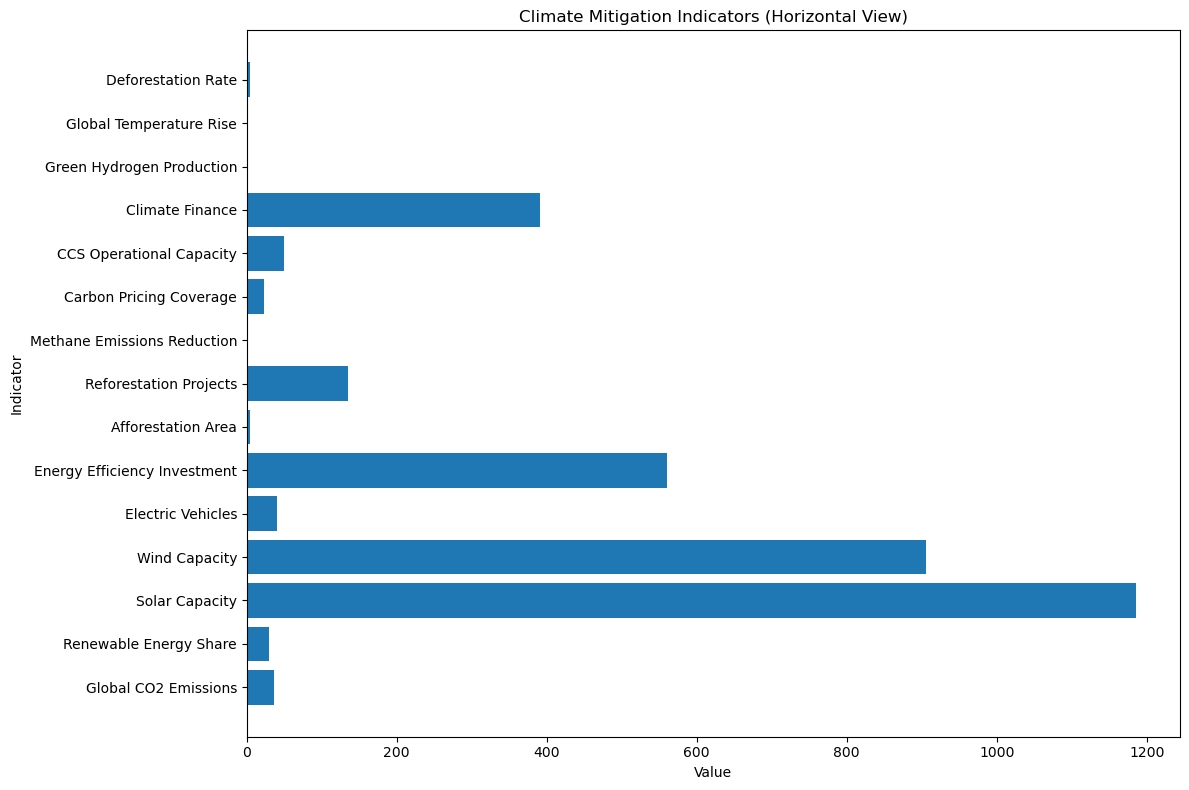

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_horizontal_bar(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    df = pd.read_csv(path)
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
    df = df.dropna(subset=["Value"])

    plt.figure(figsize=(12,8))
    plt.barh(df["Indicator"], df["Value"])
    plt.title("Climate Mitigation Indicators (Horizontal View)")
    plt.xlabel("Value")
    plt.ylabel("Indicator")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_horizontal_bar()


In [10]:
import pandas as pd

# Function to clean dataset for ML use
def clean_dataset(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    df = pd.read_csv(path)

    # Convert Value and Year columns to numeric
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

    # Remove rows with missing/invalid data
    df = df.dropna()

    return df

# Execute when run directly
if __name__ == "__main__":
    df = clean_dataset()
    print(df)


                       Indicator  \
0           Global CO2 Emissions   
1         Renewable Energy Share   
2                 Solar Capacity   
3                  Wind Capacity   
4              Electric Vehicles   
5   Energy Efficiency Investment   
6             Afforestation Area   
7         Reforestation Projects   
8    Methane Emissions Reduction   
9        Carbon Pricing Coverage   
10      CCS Operational Capacity   
11               Climate Finance   
12     Green Hydrogen Production   
13       Global Temperature Rise   
14            Deforestation Rate   

                                       Description  Year    Value  \
0                Total emissions from fossil fuels  2022    36.80   
1             Share of electricity from renewables  2022    29.00   
2               Installed global solar PV capacity  2023  1185.00   
3                   Installed global wind capacity  2023   906.00   
4         Number of electric vehicles in operation  2023    40.00   
5        

C:\Users\jathi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted value for 2030: 1210.9086363636598


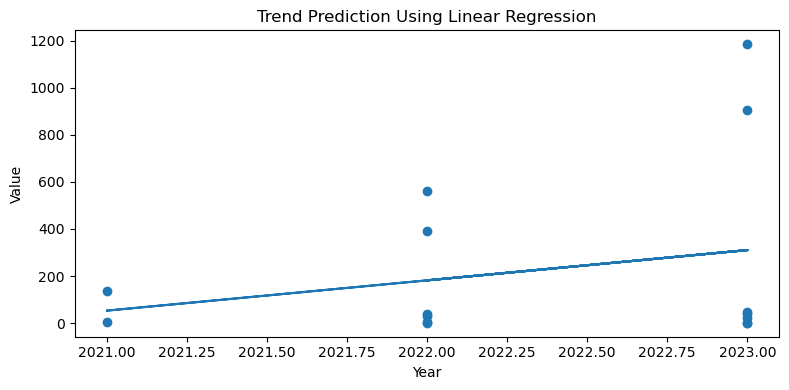

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Function to run a linear regression model on the dataset
def run_model(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    df = pd.read_csv(path)

    # Convert necessary columns to numeric types
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

    # Remove invalid rows
    df = df.dropna()

    # Prepare input (X) and output (y) data
    X = df[["Year"]]  # Feature: year
    y = df["Value"]   # Target: indicator value

    # Create and train a simple linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Choose a future year to predict
    future_year = 2030
    predicted_value = model.predict([[future_year]])[0]

    # Print prediction result
    print(f"Predicted value for {future_year}: {predicted_value}")

    # Plot actual data points
    plt.figure(figsize=(8,4))
    plt.scatter(df["Year"], df["Value"])

    # Plot regression line
    plt.plot(df["Year"], model.predict(X))

    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title("Trend Prediction Using Linear Regression")
    plt.tight_layout()
    plt.show()

# Execute model
if __name__ == "__main__":
    run_model()


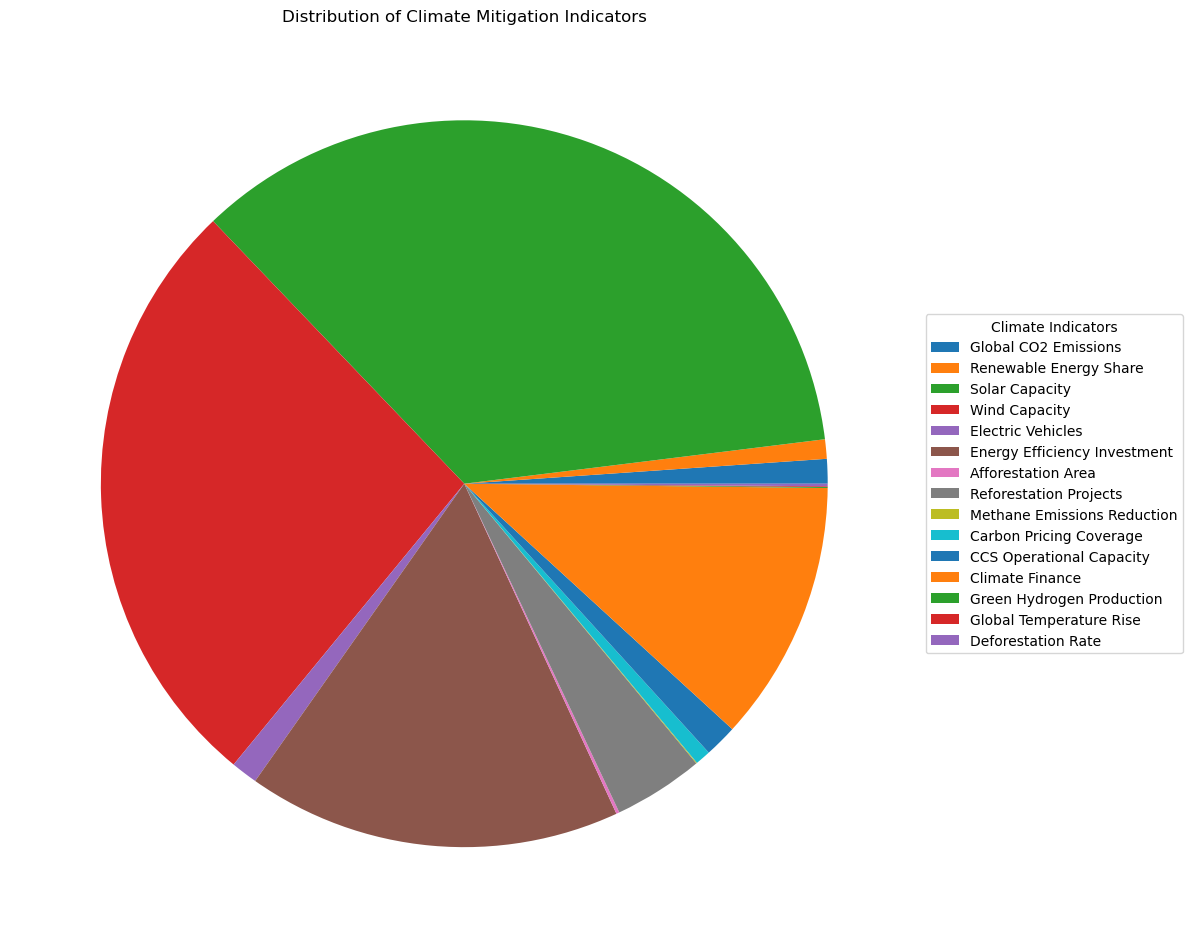

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_clean(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    df = pd.read_csv(path)
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
    df = df.dropna(subset=["Value"])

    plt.figure(figsize=(12,12))

    # Pie chart without text on slices to avoid overlap
    patches, texts = plt.pie(df["Value"])

    # Add a legend instead of labels on slices
    plt.legend(
        patches,
        df["Indicator"],
        title="Climate Indicators",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    plt.title("Distribution of Climate Mitigation Indicators")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_pie_clean()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stem(path=r"\Users\jathi\OneDrive\Desktop\global_climate_mitigation_data.csv"):
    df = pd.read_csv(path)
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
    df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
    df = df.dropna()

    plt.figure(figsize=(10,5))
    plt.stem(df["Year"], df["Value"], use_line_collection=True)
    plt.title("Stem Plot of Year vs Value")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_stem()


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1000x500 with 0 Axes>